This notebook documents how the greatest weighted simple path is found between community route start and end nodes as found in the node ranking process.

In [1]:
import osmnx as ox
import networkx as nx
import pandas as pd
import config
import route_planning.helpers.route_planning_helper as helper

Load the graph where route start and end nodes are flagged.

Then create a subgraph for each community,
this will ensure simple paths found stay within a community's boundaries,
reducing computation time.

In [7]:
%%time
G = ox.load_graphml(filepath=f"{config.rp_graphml_path}/route_start_end_flagged.graphml")
helper.convert_edge_weights_to_floats(G)

community_graphs = helper.split_into_community_graphs(G)

CPU times: user 1.44 s, sys: 16.6 ms, total: 1.46 s
Wall time: 1.48 s


In [15]:
G1 = ox.load_graphml(filepath=f"{config.rp_graphml_path}/community_routes_cutoff90.graphml")
g1_nodes = ox.graph_to_gdfs(G1, edges=False)

# osmnx saved graph writes boolean values as strings so converting those
d = {"True": True, "False": False}
g1_nodes["community_route"] = g1_nodes["community_route"].map(d)
route_nodes1 = g1_nodes[(g1_nodes["community_route"])]


In [16]:
G2 = ox.load_graphml(filepath=f"{config.rp_graphml_path}/community_routes_cutoff100.graphml")
g2_nodes = ox.graph_to_gdfs(G2, edges=False)

# osmnx saved graph writes boolean values as strings so converting those
d = {"True": True, "False": False}
g2_nodes["community_route"] = g2_nodes["community_route"].map(d)
route_nodes2 = g2_nodes[(g2_nodes["community_route"])]

In [17]:
G3 = ox.load_graphml(filepath=f"{config.rp_graphml_path}/community_routes_cutoff110.graphml")
g3_nodes = ox.graph_to_gdfs(G3, edges=False)

# osmnx saved graph writes boolean values as strings so converting those
d = {"True": True, "False": False}
g3_nodes["community_route"] = g3_nodes["community_route"].map(d)
route_nodes3 = g3_nodes[(g3_nodes["community_route"])]

Adding a boolean community_route flag to all nodes, nodes on the eventual route will have this set to true

In [8]:
nx.set_node_attributes(G, False, "community_route")

It is unclear what cutoff value to use when finding the simple paths.

The cutoff is the depth the search for paths should have. A shorter depth means less run time for the search.

Trying a cutoff of 90 initially => no paths longer than 90 nodes. Timing the execution for comparison with other cutoff

In [9]:
%%time
routes_90cutoff = []
for graph in community_graphs:
    path = helper.find_highest_weighted_simple_path(graph, cutoff=90)
    print(path)
    routes_90cutoff.append(path)

[262459232, 2110993824, 2112562727, 2112562550, 258440720, 2112562637, 2112562834, 2114692416, 258430807, 2739577689, 2114692276, 1979831232, 1979830654, 6302291471, 339828849, 2114692414, 258430916, 2114692923, 2114692649, 2679019572, 2114649718, 1557357468, 1976663550, 258431037, 2114650574, 2114649685, 2354772221, 258431074, 1976663072, 2114649669, 258431117, 262482303, 2114650326, 2114649822, 2114649983, 2114650088, 2114650363, 1411721776, 529130810, 1411690486, 891663587, 2115875593, 2115875669, 2115875525, 2115875630, 891663458, 824799710, 2859800089, 1411703035, 528692201, 7313926535, 258661238, 1297382815, 155939804, 1411714691, 258601516, 1411690478, 1411702960, 258601523]
[258453962, 309927031, 309927018, 3180446981, 258454085, 258454102, 309927034, 258454188, 1984692868, 1984692752, 1557330797, 258454371, 1630123993, 1630123995, 258454421, 258454435, 262482273, 258449136, 262482278, 1885963573, 1557332267, 262482285, 262482288, 1557324455, 258449094, 258449084, 309963646, 30

5min 35s to find all community routes.


Combine all route nodes and find the total number of community_route nodes

In [10]:
all_route_nodes_90cutoff = sum(routes_90cutoff, [])
len(all_route_nodes_90cutoff)

1125

1125 total nodes included in routes.

Make a copy of the graph and set community_route=True values if a node is on any of the found paths

In [11]:
G_90cutoff = G.copy()
for node in all_route_nodes_90cutoff:
    G_90cutoff.nodes[node]["community_route"] = True
community_route_nodes = [x for x,y in G_90cutoff.nodes(data=True) if y["community_route"]]
len(community_route_nodes)

1125

In [12]:
ox.save_graphml(G_90cutoff, filepath=f"{config.rp_graphml_path}/community_routes_cutoff90.graphml")

Plot the graph with community routes

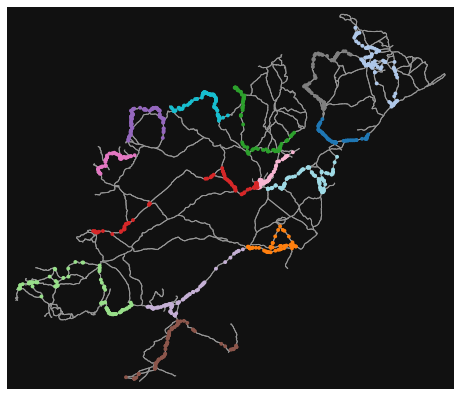

In [13]:
helper.plot_community_bus_routes(G_90cutoff)

Now trying with cutoff=100

In [14]:
%%time
routes_100cutoff = []
for graph in community_graphs:
    path = helper.find_highest_weighted_simple_path(graph, cutoff=100)
    print(path)
    routes_100cutoff.append(path)

[262459232, 2110993824, 2112562727, 2112562550, 258440720, 2112562637, 2112562834, 2114692416, 258430807, 2739577689, 2114692276, 1979831232, 1979830654, 6302291471, 339828849, 2114692414, 258430916, 2114692923, 2114692649, 2679019572, 2114649718, 1557357468, 1976663550, 258431037, 2114650574, 2114649685, 2354772221, 258431074, 1976663072, 2114649669, 258431117, 262482303, 2114650326, 2114649822, 2114649983, 2114650088, 2114650363, 1411721776, 529130810, 1411690486, 891663587, 2115875593, 2115875669, 2115875525, 2115875630, 891663458, 824799710, 2859800089, 1411703035, 528692201, 7313926535, 258661238, 1297382815, 155939804, 1411714691, 258601516, 1411690478, 1411702960, 258601523]
[258453962, 309927031, 309927018, 3180446981, 258454085, 258454102, 309927034, 258454188, 1984692868, 1984692752, 1557330797, 258454371, 1630123993, 1630123995, 258454421, 258454435, 262482273, 258449136, 1557324472, 2143150374, 258449094, 258449084, 309963646, 309963645, 2278477863, 843308742, 2062416081, 3

cutoff=100 took approx 17 minutes to find all community routes.

Find the number of nodes included in all paths found

In [15]:
all_route_nodes_100cutoff = sum(routes_100cutoff, [])
len(all_route_nodes_100cutoff)

1199

1199 nodes included in all routes - 74 more than when using cutoff=90 indicating slightly more coverage.

Make a copy of the graph and set community_route=True values if a node is on any of the found paths

In [16]:
G_100cutoff = G.copy()
for node in all_route_nodes_100cutoff:
    G_100cutoff.nodes[node]["community_route"] = True
community_route_nodes = [x for x,y in G_100cutoff.nodes(data=True) if y["community_route"]]
len(community_route_nodes)

1199

In [17]:
ox.save_graphml(G_100cutoff, filepath=f"{config.rp_graphml_path}/community_routes_cutoff100.graphml")

Plot the graph with community routes found with cutoff=100

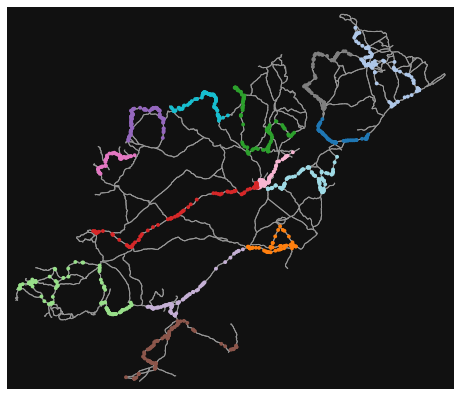

In [18]:
helper.plot_community_bus_routes(G_100cutoff)

Finding all simple paths with cutoff=110 to see if any significant increase in coverage is achievable

In [19]:
%%time
routes_110cutoff = []
for graph in community_graphs:
    path = helper.find_highest_weighted_simple_path(graph, cutoff=110)
    print(path)
    routes_110cutoff.append(path)

[262459232, 2110993824, 2112562727, 2112562550, 258440720, 2112562637, 2112562834, 2114692416, 258430807, 2739577689, 2114692276, 1979831232, 1979830654, 6302291471, 339828849, 2114692414, 258430916, 2114692923, 2114692649, 2679019572, 2114649718, 1557357468, 1976663550, 258431037, 2114650574, 2114649685, 2354772221, 258431074, 1976663072, 2114649669, 258431117, 262482303, 2114650326, 2114649822, 2114649983, 2114650088, 2114650363, 1411721776, 529130810, 1411690486, 891663587, 2115875593, 2115875669, 2115875525, 2115875630, 891663458, 824799710, 2859800089, 1411703035, 528692201, 7313926535, 258661238, 1297382815, 155939804, 1411714691, 258601516, 1411690478, 1411702960, 258601523]
[258453962, 258453976, 258454085, 258454102, 309927034, 258454188, 1984692868, 1984692752, 1557330797, 258454371, 1630123993, 1630123995, 258454421, 258454435, 262482273, 258449136, 1557324472, 2143150374, 258449094, 258449084, 309963646, 309963645, 2278477863, 843308742, 2062416081, 309963601, 5439449935, 7

42 minutes run time for cutoff of 110

Find the number of nodes included in all paths found

In [20]:
all_route_nodes_110cutoff = sum(routes_110cutoff, [])
len(all_route_nodes_110cutoff)

1266

1266 total route nodes now, an increase of 67. About the same increase as from 90 to 100 cutoff, with the added time complexity this is as far as the cutoff will increased.

Make another copy of the graph and set community_route=True values if a node is on any of the found paths

In [21]:
G_110cutoff = G.copy()
for node in all_route_nodes_110cutoff:
    G_110cutoff.nodes[node]["community_route"] = True
community_route_nodes = [x for x,y in G_110cutoff.nodes(data=True) if y["community_route"]]
len(community_route_nodes)

1266

In [22]:
ox.save_graphml(G_110cutoff, filepath=f"{config.rp_graphml_path}/community_routes_cutoff110.graphml")

Plot the graph with community routes for cutoff=110

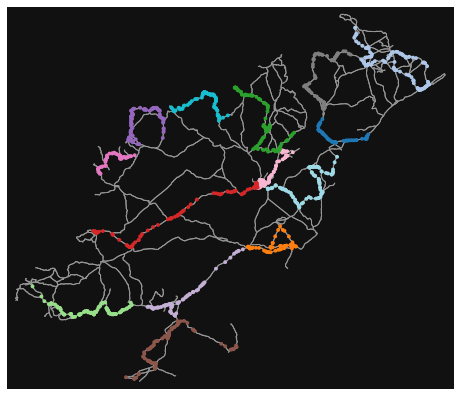

In [23]:
helper.plot_community_bus_routes(G_110cutoff)

Using the cutoff=110 simple paths as the community bus routes.

Now any nodes on these routes that are adjacent to edges
with no population (as assigned earlier) will be removed.
The remaining nodes will give the location of bus stops.

Find the maximum degree value for the graph's nodes. That is the most possible adjacent edges a node can have in this graph.
Then use this max. to keep only nodes with a weighted degree less than that.
This list of nodes will then be used to remove community_route flag from those nodes in the graph

In [36]:
degrees = dict(list(G_110cutoff.degree()))
max_degrees = max(degrees.values())
weighted_degrees = dict(list(G_110cutoff.degree(weight="weight")))

no_population_nodes = [k for k, v in weighted_degrees.items() if v <= max_degrees]

In [38]:
# Set community_route=False for all those nodes
for node in no_population_nodes:
    G_110cutoff.nodes[node]["community_route"] = False
community_route_nodes = [x for x,y in G_110cutoff.nodes(data=True) if y["community_route"]]
len(community_route_nodes)

673

Left with around half the original number of community route nodes.

Plot the final community routes

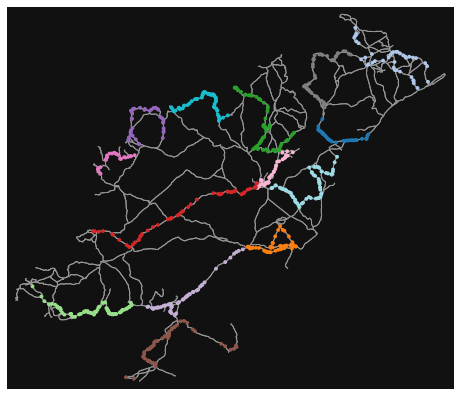

In [41]:
helper.plot_community_bus_routes(G_110cutoff)


In [42]:
ox.save_graphml(G_110cutoff, filepath=f"{config.rp_graphml_path}/community_routes_cutoff110.graphml")